In [133]:
# AUTHOR: AKHILA REDDY KOMMITI
# COURSE: ADTA 5410
# PROGRAM: Assignment 3
# PURPOSE: This code performs a exploratory analysis and evaluation of diamond pricing dataset

# PROCESS:
# Loading, cleaning, and managing the datset's missing values.
# Determining the average cost of a diamond.
# Using scatterplots to visualize the current relationships between features, such as price and carat columns.
# Implementing  and comparing different regression models like Ordinary Least Squares, Ridge, Lasso, and ElasticNet.
# Determining and managing the dataset's outliers in the "price" and "carat" columns.
# Examining the percentage of missing data
# Evaluating the multicollinearity of various characteristics and selecting the best regularization techniques.

# OUTPUT:
# Printing the Descriptive statistics, including average diamond price.
# Visualization of relationships between columns  carat and price.
# Printing the results of different regression models (OLS, Ridge, Lasso, ElasticNet).
# Determining which color and clarity combinations are most frequently seen in the dataset.
# Reports on the dataset's multicollinearity, outliers, and missing values

# HONOR CODE: On my honor, I have neither given
# nor received unauthorized aid on this academic work, to
# include the assistance from others in the class, the use of
# generative AI to produce the original code, or the use of
# code obtained from external sources such as stacked
# overflow, in example. I realize the use of unauthorized
# will at a minimum result in a zero for this assignment and
# and may lead to further honor code disciplinary results

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import seaborn as sns
import numpy as np

In [135]:

# Load the dataset
df_ARK = pd.read_excel('diamondswmissing.xlsx')

# Set the index (assuming 'ID' is the appropriate column)
df_ARK.set_index('obs', inplace=True)



In [136]:

# Check if the dataset is loaded correctly
print(df_ARK.head())


     price  Carat      cut color clarity  depth  table     x     y     z
obs                                                                     
1      326    NaN    Ideal     E     SI2   61.5   55.0  3.95  3.98  2.43
2      326   0.21  Premium     E     SI1   59.8   61.0  3.89  3.84  2.31
3      327   0.23     Good     E     VS1   56.9   65.0  4.05  4.07  2.31
4      334   0.29  Premium     I     VS2   62.4   58.0  4.20   NaN  2.63
5      335   0.31     Good     J     SI2   63.3   58.0  4.34  4.35   NaN


In [137]:
# Display column descriptions
print(df_ARK.info())

# Optionally, you can display summary statistics for numerical columns
print(df_ARK.describe())


<class 'pandas.core.frame.DataFrame'>
Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   price    53940 non-null  int64  
 1   Carat    48473 non-null  float64
 2   cut      51276 non-null  object 
 3   color    52369 non-null  object 
 4   clarity  52251 non-null  object 
 5   depth    52287 non-null  float64
 6   table    52340 non-null  float64
 7   x        52342 non-null  float64
 8   y        52304 non-null  float64
 9   z        52301 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB
None
              price         Carat         depth         table             x  \
count  53940.000000  48473.000000  52287.000000  52340.000000  52342.000000   
mean    3932.799722      0.798309     61.749058     57.458378      5.732180   
std     3989.439738      0.474125      1.431494      2.236438      1.122602   
min      326.000000      0.200000     43.000000     43.00

In [138]:
# Filling missing values with the median (or use mean/mode as needed)
df_ARK['Carat'].fillna(df_ARK['Carat'].median(), inplace=True)
df_ARK['z'].fillna(df_ARK['z'].median(), inplace=True)

# Verify missing values are filled
print(df_ARK.isnull().sum())


price         0
Carat         0
cut        2664
color      1571
clarity    1689
depth      1653
table      1600
x          1598
y          1636
z             0
dtype: int64


In [139]:
# Drop rows with missing values (if needed)
df_clean = df_ARK.dropna()

# Check the new number of rows and columns
print(df_clean.shape)


(42740, 10)


In [140]:
#calculating the average price
avg_price = df_ARK['price'].mean()
print(f"Average Price of the diamonds in the dataset: {avg_price}")

Average Price of the diamonds in the dataset: 3932.799721913237


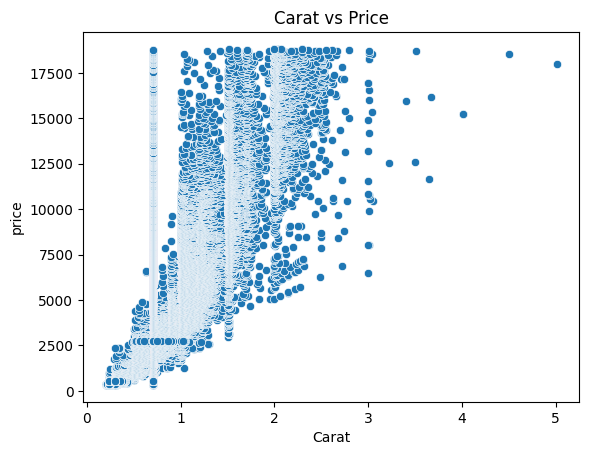

Correlation between carat and price: 0.8716393755629868


In [141]:
# Scatterplot of carat vs price
sns.scatterplot(x='Carat', y='price', data=df_ARK)
plt.title('Carat vs Price')
plt.show()

# Calculate the correlation between carat and price
correlation = df_ARK['Carat'].corr(df_ARK['price'])
print(f"Correlation between carat and price: {correlation}")

In [142]:
# Check data types of the predictors and response variable
print(df_ARK.dtypes)

# Check for missing values
print(df_ARK.isnull().sum())


price        int64
Carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
dtype: object
price         0
Carat         0
cut        2664
color      1571
clarity    1689
depth      1653
table      1600
x          1598
y          1636
z             0
dtype: int64


In [143]:
# Prepare data by filling missing values
df_clean = df_ARK.fillna(df_ARK.select_dtypes(include=[float, int]).mean())

# Define features and target
X = df_clean[['Carat', 'depth', 'table', 'x', 'y', 'z']]
y = df_clean['price']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 3131408.635657177


In [144]:
# Calculate proportion of missing values in 'Carat' and 'z' columns
missing_carat = df_ARK['Carat'].isnull().mean() * 100
missing_z = df_ARK['z'].isnull().mean() * 100
print(f"Proportion of missing 'Carat' values: {missing_carat}%")
print(f"Proportion of missing 'z' values: {missing_z}%")

Proportion of missing 'Carat' values: 0.0%
Proportion of missing 'z' values: 0.0%


In [145]:
# Fit a Ridge regression model
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Predict and evaluate Ridge regression
y_pred_ridge = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f"Mean Squared Error for Ridge Regression: {mse_ridge}")


Mean Squared Error for Ridge Regression: 3131379.603824318


In [146]:
# Create dummies for categorical variables (cut, color, clarity)
df_dummies = pd.get_dummies(df_ARK[['cut', 'color', 'clarity']])

# Lasso regression
lasso = Lasso(alpha=0.1)  # Adjust alpha as needed
lasso.fit(X_train, y_train)
lasso_predictions = lasso.predict(X_test)

# Feature importance
print(f"Selected features by Lasso: {list(zip(df_dummies.columns, lasso.coef_))}")

Selected features by Lasso: [('cut_Fair', 3773.8093875367945), ('cut_Good', -93.83258602618065), ('cut_Ideal', -84.7378635979456), ('cut_Premium', 1068.1857528825783), ('cut_Very Good', 397.1805795563614), ('color_D', 562.7015366317347)]


In [147]:
# Fit an ElasticNet regression model
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)

# Predict and evaluate ElasticNet regression
y_pred_elastic = elastic_net.predict(X_test)
mse_elastic = mean_squared_error(y_test, y_pred_elastic)
print(f"Mean Squared Error for ElasticNet Regression: {mse_elastic}")


Mean Squared Error for ElasticNet Regression: 3231000.0603564917


In [148]:
# Find the most common combination of color and clarity
common_combination = df_ARK.groupby(['color', 'clarity']).size().idxmax()
print(f"The most common combination of color and clarity is: {common_combination}")


The most common combination of color and clarity is: ('E', 'VS2')


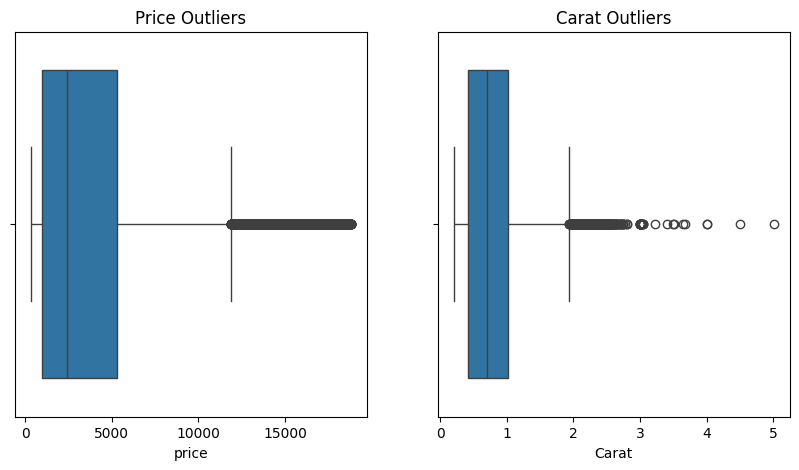

In [149]:
# Boxplot to visualize outliers in 'price' and 'Carat' columns
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=df_ARK['price'])
plt.title('Price Outliers')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_ARK['Carat'])
plt.title('Carat Outliers')

plt.show()

In [150]:
# Checking for multicollinearity using Variance Inflation Factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)


  feature         VIF
0   Carat   24.556400
1   depth  453.655921
2   table  455.319004
3       x  448.611859
4       y  277.168676
5       z  279.388735


In [151]:
# Convert categorical variables (e.g., 'cut', 'color', 'clarity') into dummy variables
X = pd.get_dummies(df_ARK[['Carat', 'cut', 'color', 'clarity']], drop_first=True)

# Make sure the target variable is numeric
y = pd.to_numeric(df_ARK['price'], errors='coerce')



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Display coefficients
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

Coefficients: [ 8442.35352698    69.49448075   361.88768138   348.4354825
   303.42786321  -112.95484706   -95.66857027  -227.92228295
  -565.45111047  -863.66964858 -1696.44982879  2210.70829924
   765.37185519   103.6755676   1524.60630363  1292.14126051
  1846.30468074  1887.52229258]
Intercept: -3745.5666456232793


In [152]:
# Increase figure size for better readability
plt.figure(figsize=(12, 10))

# Plot the heatmap with larger figure size and rotated x-axis labels
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 10})

# Rotate the x-axis labels to avoid overlap
plt.xticks(rotation=45, ha='right')  # Rotate labels 45 degrees for better readability
plt.yticks(rotation=0)  # Keep y-axis labels horizontal

# Title for the heatmap
plt.title("Correlation Matrix for Feature Multicollinearity")
plt.tight_layout()  # Adjust layout to ensure everything fits without overlap

# Display the heatmap
plt.show()


NameError: name 'correlation_matrix' is not defined

<Figure size 1200x1000 with 0 Axes>

In [153]:
# Calculate the percentage distribution of the price categories
price_distribution = df_clean['price'].value_counts(normalize=True) * 100
print(price_distribution)


price
605      0.244716
802      0.235447
625      0.233593
828      0.231739
776      0.229885
           ...   
8816     0.001854
14704    0.001854
14699    0.001854
14698    0.001854
9793     0.001854
Name: proportion, Length: 11602, dtype: float64


In [154]:
# Print the first few predicted values and actual values
print(f"Predicted prices: {y_pred[:5]}")
print(f"Actual prices: {y_test[:5]}")


Predicted prices: [ 260.86828003 3246.27998554 1767.82989207 2007.648299   9692.68972312]
Actual prices: obs
1389      559
50053    2201
41646    1238
42378    1304
17245    6901
Name: price, dtype: int64
